In [10]:
import pandas as pd
df = pd.read_excel("zad2.xlsx")
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt

1.Wyświetl pierwsze wiersze tabeli przy użyciu metody head

In [11]:
print(df.head())

                    Region  1950  1960  1970  1990  2000  2012  2014  2019
0                     Krym  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1           Obwód winnicki  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Obwód wołyński  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Obwód dniepropietrowski  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4                  Donieck  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


2.Zdefiniuj liczbę wierszy i kolumn w zbiorze danych (atrybut shape)

In [12]:
wiersze, kolumny = df.shape
print("liczba wierszy: ", wiersze)
print("liczba kolumn: ", kolumny)

liczba wierszy:  28
liczba kolumn:  9


3.Zastąp wartość "—" w tabeli wartością NaN

In [13]:
pd.set_option('future.no_silent_downcasting', True)
df.replace("—", np.nan, inplace=True)
print(df)

                     Region    1950       1960  1970       1990       2000  \
0                      Krym  23.000  20.600000  16.0  13.000000   7.300000   
1            Obwód winnicki  22.400  19.200000  14.2  12.400000   8.400000   
2            Obwód wołyński  24.700  25.000000  17.9  15.300000  11.200000   
3   Obwód dniepropietrowski  20.400  20.400000  15.1  12.300000   7.100000   
4                   Donieck  27.100  21.400000  14.0  10.900000   6.100000   
5         Obwód żytomierski  26.100  22.300000  15.9  12.900000   8.900000   
6          Obwód zakarpacki  31.400  27.300000  20.7  16.800000  11.500000   
7           Obwód zaporoski  21.900  19.700000  15.0  12.400000   7.100000   
8     Obwód iwanofrankiwski  24.300  24.800000  18.2  15.500000  10.300000   
9              Miasto Kijów  20.400  18.900000  15.6  12.300000   7.300000   
10      Obwód kirowohradzki  21.600  17.100000  14.5  12.600000   7.900000   
11           Obwód ługański  26.200  23.500000  14.4  11.600000 

4.Zdefiniuj typy wszystkich kolumn za pomocą dataframe.dtypes

In [14]:
print(df.dtypes)

Region     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


5. Zmień typy kolumn nienumerycznych na numeryczne. Podpowiedź: są to kolumny, w których znajdował się symbol "—"

In [15]:
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_numeric(df[column])
        except ValueError:
            pass

In [16]:
print(df.dtypes)

Region     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


6. Oblicz proporcję pustych miejsc w każdej kolumnie (użyj metod isnull i sum)

In [17]:
ppm = df.isnull().sum() / len(df)
print("Proporcje pustych miejsc w każdej kolumnie:")
print(ppm)


Proporcje pustych miejsc w każdej kolumnie:
Region    0.035714
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


7. Usuń z tabeli dane dla całego kraju, ostatni wiersz tabeli

In [18]:
df = df.drop(df.index[-1])
print(df)

                     Region  1950  1960  1970  1990  2000  2012  2014  2019
0                      Krym  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1            Obwód winnicki  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2            Obwód wołyński  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3   Obwód dniepropietrowski  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4                   Donieck  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Obwód żytomierski  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6          Obwód zakarpacki  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7           Obwód zaporoski  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8     Obwód iwanofrankiwski  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9              Miasto Kijów  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10      Obwód kirowohradzki  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11           Obwód ługański  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          

8. Zastąp brakujące dane w kolumnach średnimi wartościami tych kolumn (używając metody fillna)

In [19]:
# Wybieram tylko kolumny numeryczne
numeric_cols = df.select_dtypes(include='number')

# Obliczam średnie wartości dla kolumn numerycznych
means = numeric_cols.mean()

# Zastąpuje brakujące dane w kolumnach średnimi wartościami
df = df.fillna(means)
print(df)

                     Region    1950       1960  1970  1990  2000  2012  \
0                      Krym  23.000  20.600000  16.0  13.0   7.3  12.6   
1            Obwód winnicki  22.400  19.200000  14.2  12.4   8.4  11.2   
2            Obwód wołyński  24.700  25.000000  17.9  15.3  11.2  14.8   
3   Obwód dniepropietrowski  20.400  20.400000  15.1  12.3   7.1  11.2   
4                   Donieck  27.100  21.400000  14.0  10.9   6.1   9.8   
5         Obwód żytomierski  26.100  22.300000  15.9  12.9   8.9  12.2   
6          Obwód zakarpacki  31.400  27.300000  20.7  16.8  11.5  15.1   
7           Obwód zaporoski  21.900  19.700000  15.0  12.4   7.1  10.6   
8     Obwód iwanofrankiwski  24.300  24.800000  18.2  15.5  10.3  12.4   
9              Miasto Kijów  20.400  18.900000  15.6  12.3   7.3  12.2   
10      Obwód kirowohradzki  21.600  17.100000  14.5  12.6   7.9  11.0   
11           Obwód ługański  26.200  23.500000  14.4  11.6   6.2   9.6   
12                     Lwów  23.400  2

9. Uzyskaj listę regionów, w których wskaźnik urodzeń w 2019 r. był wyższy niż średnia dla Ukrainy
   

In [20]:
# Obliczam średnią wartość wzkaźnika urodzeń z całej Ukrainy dla roku 2019, pomijając pierwszy wiersz tej kolumny który jest nazwą
average_born = df.loc[1:, 2019].mean()
print("średnia dla Ukrainy: ", average_born)
regiony_powyżej_średniej = df[df[2019] > average_born]['Region']
print("regiony z wyższym wskaźnikiem niż średnia: ")
#print(regiony_powyżej_średniej.to_string(index=False))

średnia dla Ukrainy:  8.017391304347827
regiony z wyższym wskaźnikiem niż średnia: 


10. Który region miał najwyższy wskaźnik urodzeń w 2014 roku?

In [21]:
max_birth_rate_region = df.loc[df[2014].idxmax()]['Region']
print("Region z najwyższym wskaźnikiem urodzeń w 2014 roku:", max_birth_rate_region)

Region z najwyższym wskaźnikiem urodzeń w 2014 roku: Obwód rówieński


11. Zbuduj wykres słupkowy wskaźnika urodzeń według regionów w 2019 r.

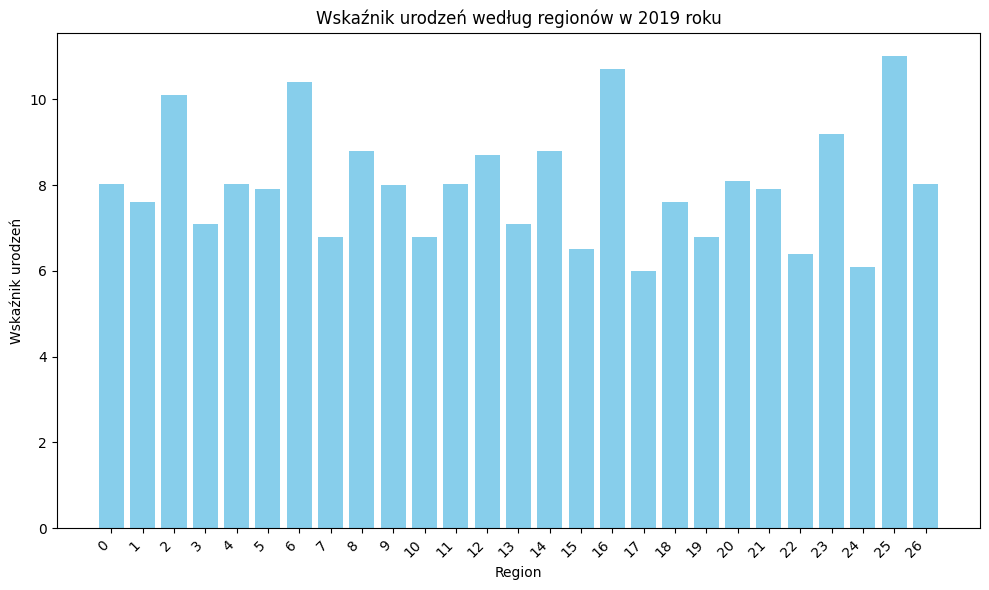

In [22]:
# Konwersja indeksów na typ str
df.index = df.index.astype(str)

# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
plt.bar(df.index, df[2019], color='skyblue')

# Dodanie tytułu i etykiet osi
plt.title('Wskaźnik urodzeń według regionów w 2019 roku')
plt.xlabel('Region')
plt.ylabel('Wskaźnik urodzeń')

# Rotacja etykiet na osi X, aby były bardziej czytelne
plt.xticks(rotation=45, ha='right')

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()